In [86]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [40]:
# Load training and test dataset
train = pd.read_csv('bigmart_train.csv')
test = pd.read_csv('bigmart_test.csv')

Exploratory Data Analysis


In [41]:
# Check number of rows and columns in the training dataset
print("Training set shape:", train.shape)

Training set shape: (8523, 12)


In [42]:
# Print the column names of the training dataset
print("Training set columns:")
print(train.columns)

Training set columns:
Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


In [43]:
# Check number of rows and columns in the test dataset
print("Test set shape:", test.shape)

Test set shape: (5681, 11)


In [44]:
# Print the column names of the test dataset
print("Test set columns:")
print(test.columns)

Test set columns:
Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')


In [45]:
# Combine train and test into one file by concatenating the two datasets
train['Source']='Train'
test['Source']='Test'
data = pd.concat([train, test], ignore_index=True)

# Check number of columns and rows in the new dataframe
print("New dataset shape:", data.shape)                   

New dataset shape: (14204, 13)


In [46]:
# Check first five entries of the new dataset
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,Train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Train


In [47]:
# Numerical data summary of the dataset
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [48]:
# Check for the total number of missing values (per column) of the dataset
data.isnull().sum()

# There are three variables with missing values - Outlet_Size, Item_Weight and Item_Outlet_Sales

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Source                          0
dtype: int64

Add new columns

In [49]:
# Print unique values of the Outlet_Establishment_Year column
data['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004])

In [50]:
# Calculate Outlet_Age
data['Outlet_Age'] = 2018 - data['Outlet_Establishment_Year']
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Train,19
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Train,9
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Train,19
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,Train,20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Train,31


Treat missing values

In [51]:
# Print unique values of the Outlet_Size column
data['Outlet_Size'].unique()                              # it has missing values

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [52]:
# Print the count value of the Outlet_Size column
data['Outlet_Size'].value_counts()

#Nan are not counted

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [53]:
# Find the most common value in Outlet_Size
data['Outlet_Size'].mode()[0]

'Medium'

In [54]:
# Replace missing values in Outlet_Size with its mode
data['Outlet_Size']=data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0])

In [55]:
# Replace missing values in Item_Weight with its mean
data['Item_Weight']=data['Item_Weight'].fillna(data['Item_Weight'].mean())

In [56]:
# Replace missing values in Item_Outlet_Sales with its mean
data['Item_Outlet_Sales']=data['Item_Outlet_Sales'].fillna(data['Item_Outlet_Sales'].mean())

Replace typos and differences in representation

In [58]:
# Print unique values of the Item_Fat_Content column
data['Item_Fat_Content'].unique()

# Typos and differences in representation in categories of Item_Fat_Content were found

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [59]:
# Print the count value of the Item_Fat_Content column
data['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [60]:
# Replace all other representations of low fat with Low Fat
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace(['low fat', 'LF'], 'Low Fat') 

# Replace all representations of reg with Regular
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace('reg', 'Regular') 

Detect and remove outliers from the data

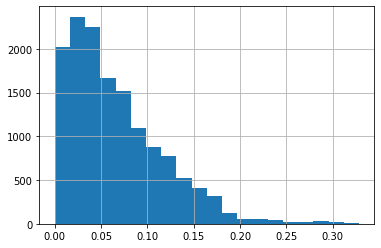

In [61]:
# Plot a histogram to reveal the distribution of the Item_Visibility column
data['Item_Visibility'].hist(bins=20)

In [62]:
# Calculate the first quantile for Item_Visibility
Q1 = data['Item_Visibility'].quantile(0.25)

# Calculate the third quantile for Item_Visibility
Q3 = data['Item_Visibility'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3-Q1

# Remove outliers from the data using a query - the resulting data is stored in fill_data
fill_data = data.query('(@Q1 - 1.5 * @IQR) <= Item_Visibility <= (@Q3 + 1.5 * @IQR)')

# Display the data
fill_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Train,19
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Train,9
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Train,19
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Train,20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Train,31


In [64]:
# Check the shape of the dataset without the outliers
print("Outlier-removed dataset shape:", fill_data.shape)

Outlier-removed dataset shape: (13943, 14)


In [65]:
# Check the shape of the original dataset shape in order to compare
print("Original dataset shape:", data.shape)

Original dataset shape: (14204, 14)


In [95]:
# Assign fill_data dataset to data DataFrame
data = fill_data

In [96]:
# Modify Item_Visibility by converting the numerical values into the categories Low Visibility, Visibility, and High Visibility
data['Item_Visibility_bins'] = pd.cut(data['Item_Visibility'], [0.000, 0.065, 0.13, 0.2], labels = ['Low Viz', 'Viz', 'High Viz'])

# Print the count of Item_Visibility_bins
data['Item_Visibility_bins'].value_counts()

Low Viz     7363
Viz         4283
High Viz    1418
Name: Item_Visibility_bins, dtype: int64

Label Encoding

In [97]:
# Code all categorical variables using 'LabelEncoder' - Option 1

# Initialize the label encoder
le = LabelEncoder()

# Transform Item_Fat_Content
data['Item_Fat_Content'] = le.fit_transform(data['Item_Fat_Content'])

# Transform Item_Visibility_bins
data['Item_Visibility_bins'] = le.fit_transform(data['Item_Visibility_bins'])

# Transform Outlet_Size
data['Outlet_Size'] = le.fit_transform(data['Outlet_Size'])

# Transform Outlet_Location_Type
data['Outlet_Location_Type'] = le.fit_transform(data['Outlet_Location_Type'])

In [98]:
# Print the unique values of Outlet_Type
data['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [99]:
# Create dummies for Outlet_Type - Option 2
dummy = pd.get_dummies(data['Outlet_Type'])
dummy.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [100]:
# Explore the column Item_Identifier
data['Item_Identifier']

0        FDA15
1        DRC01
2        FDN15
3        FDX07
4        NCD19
         ...  
14199    FDB58
14200    FDD47
14201    NCO17
14202    FDJ26
14203    FDU37
Name: Item_Identifier, Length: 13943, dtype: object

In [101]:
# Count the different types of food, nonconsumable items, and drinks
data['Item_Identifier'].value_counts()

FDE33    10
FDM12    10
FDY47    10
FDT03    10
FDO01    10
         ..
FDA10     7
FDO33     7
FDZ60     7
NCW54     7
FDG21     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [102]:
# Reduce the multiple categories present in Item_Identifier by mapping - Option 3
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD': 'Food',
                                                             'NC': 'Non-Consumable',
                                                             'DR': 'Drinks'})

In [103]:
# Present the categories present in the Item_Type_Combined column
data['Item_Type_Combined'].value_counts()

Food              9991
Non-Consumable    2652
Drinks            1300
Name: Item_Type_Combined, dtype: int64

In [104]:
# Perform One-Hot Encoding for all categorical columns as the model works on numerical values and not on categorical values
data = pd.get_dummies(data, columns=['Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'Item_Type_Combined'])

# Check its types
data.dtypes

Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                      float64
Item_Type                             object
Item_MRP                             float64
Outlet_Identifier                     object
Outlet_Establishment_Year              int64
Item_Outlet_Sales                    float64
Source                                object
Outlet_Age                             int64
Item_Visibility_bins                   int64
Item_Fat_Content_0                     uint8
Item_Fat_Content_1                     uint8
Outlet_Location_Type_0                 uint8
Outlet_Location_Type_1                 uint8
Outlet_Location_Type_2                 uint8
Outlet_Size_0                          uint8
Outlet_Size_1                          uint8
Outlet_Size_2                          uint8
Outlet_Type_Grocery Store              uint8
Outlet_Type_Supermarket Type1          uint8
Outlet_Type_Supermarket Type2          uint8
Outlet_Typ

Preparing the final dataset

In [105]:
# Drop the columns which have been converted into different types
data.drop(['Item_Type', 'Outlet_Establishment_Year'], axis=1, inplace=True)

# Divide the dataset into train and test datasets
train = data.loc[data['Source']=='Train']
test = data.loc[data['Source']=='Test']

# Drop the unnecessary columns
test.drop(['Item_Outlet_Sales', 'Source'], axis=1, inplace=True)
train.drop(['Source'], axis=1, inplace=True)

In [107]:
# Export the modified versions of the datasets
train.to_csv('train_modified.csv', index=False)
test.to_csv('test_modified.csv', index=False)

New dataset preprocessing

In [108]:
# Read the train_modified.csv and test_modified.csv dataset
train2 = pd.read_csv('train_modified.csv')
test2 = pd.read_csv('test_modified.csv')

# Print the data types of train2 columns
train2.dtypes

Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                      float64
Item_MRP                             float64
Outlet_Identifier                     object
Item_Outlet_Sales                    float64
Outlet_Age                             int64
Item_Visibility_bins                   int64
Item_Fat_Content_0                     int64
Item_Fat_Content_1                     int64
Outlet_Location_Type_0                 int64
Outlet_Location_Type_1                 int64
Outlet_Location_Type_2                 int64
Outlet_Size_0                          int64
Outlet_Size_1                          int64
Outlet_Size_2                          int64
Outlet_Type_Grocery Store              int64
Outlet_Type_Supermarket Type1          int64
Outlet_Type_Supermarket Type2          int64
Outlet_Type_Supermarket Type3          int64
Item_Type_Combined_Drinks              int64
Item_Type_Combined_Food                int64
Item_Type_

In [109]:
# Drop irrelevant variables from train2 dataset and create the independent and dependent variables
X_train = train2.drop(['Item_Outlet_Sales', 'Outlet_Identifier', 'Item_Identifier'], axis=1)
y_train = train2.Item_Outlet_Sales

# Check the independent variable
X_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Visibility_bins,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,9.30,0.016047,249.8092,19,1,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0
1,5.92,0.019278,48.2692,9,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0
2,17.50,0.016760,141.6180,19,1,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0
3,19.20,0.000000,182.0950,20,3,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0
4,8.93,0.000000,53.8614,31,3,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1


In [111]:
# Check the dependent variable
y_train.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [110]:
# Drop irrelevant variables from test2 dataset
X_test = test2.drop(['Outlet_Identifier', 'Item_Identifier'], axis=1)
X_test.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Visibility_bins,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,20.750000,0.007565,107.8622,19,1,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0
1,8.300000,0.038428,87.3198,11,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
2,14.600000,0.099575,241.7538,20,2,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1
3,7.315000,0.015388,155.0340,11,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
4,12.792854,0.118599,234.2300,33,2,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0


Modelling

In [112]:
# Import sklearn libraries for model selection
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

# Create a train and test split
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# Fit Linear Regression into the training dataset
lin = LinearRegression()
lin.fit(xtrain, ytrain)

# Find the coefficient and intercept of the model's equation
print("Coefficients:", lin.coef_)
print("Intercept:", lin.intercept_)

Coefficients: [-1.93054423e+00 -3.47449893e+02  1.58788136e+01 -3.19310190e+01
 -4.64698319e+00 -1.55426303e+00  1.55426303e+00  1.88969149e+02
  4.83874237e+01 -2.37356573e+02  5.39972452e+02 -3.11545503e+02
 -2.28426949e+02 -1.63452944e+03 -1.26820412e+02 -3.48655405e+02
  2.11000526e+03  9.06454503e+00  3.46403369e+01 -4.37048820e+01]
Intercept: 946.4212171360937


In [113]:
# Predict the test set results
predictions = lin.predict(xtest)
predictions

array([2077.92386202, 3704.93216108, 2961.28180591, ..., 3541.28725867,
       3464.78656382, 1249.59368407])

In [114]:
# Estimate the RMSE of the model

# Import required libraries
import math

# Find the RMSE for the model
print("RMSE:", math.sqrt(mean_squared_error(ytest, predictions)))

RMSE: 1126.2352692434754


In [115]:
# Predict the column Item_Outlet_Sales of the test dataset
y_sales_pred = lin.predict(X_test)
y_sales_pred

array([1788.81075495, 1593.90875193, 1845.79649796, ..., 1831.65421972,
       3605.8573969 , 1284.78769015])

In [116]:
# Map Item_Outlet_Sales values into a dataframe
test_predictions = pd.DataFrame({'Item_Identifier': test2['Item_Identifier'],
                                 'Outlet_Identifier': test2['Outlet_Identifier'],
                                 'Item_Outlet_Sales': y_sales_pred
                                }, columns = ['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])

test_predictions

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1788.810755
1,FDW14,OUT017,1593.908752
2,NCN55,OUT010,1845.796498
3,FDQ58,OUT017,2675.927968
4,FDY38,OUT027,5134.091429
...,...,...,...
5563,FDB58,OUT046,2360.100059
5564,FDD47,OUT018,2419.143609
5565,NCO17,OUT045,1831.654220
5566,FDJ26,OUT017,3605.857397
